<a href="https://colab.research.google.com/github/JulioCesarMS/R_course/blob/master/6.-%20Manipulaci%C3%B3n%20de%20datos%20I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> **Manipulación de datos I**


**dplyr** es una gramática de la manipulación de datos, que proporciona un conjunto coherente de verbos que ayudan a resolver los retos más comunes de manipulación de datos:

- **%>%**      : Operador pip
- **select()**  : nos sirve para seleccionar variables.
- **filter()**  : nos sirve para seleccionar filas dada una expresión lógica.
- **arrange()** : nos sirve para ordenar valors de una (varias) varible(s) de forma ascendente o descendente.
- **mutate()**  : nos sirve para crear o modificar nuevas variables a partir de variables existente.

In [5]:
library('dplyr')

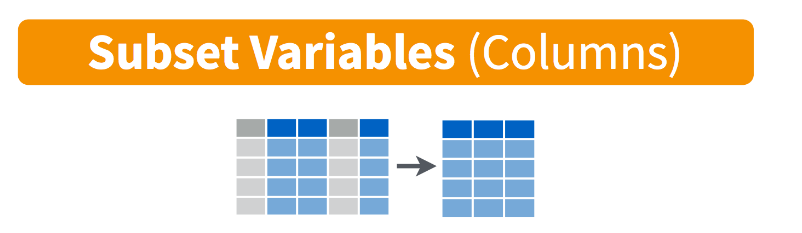

# **select()**

> **select(data, ...)** : Función para seleccionar variable(s) (columna(s)) de un data frame. Dentro de está función se pueden emplear funciones auxiliares como:
> - starts_with() : comianza con un prefijo.
> - ends_with() : termina con un sufijo.
> - contains() : contiene una cadena.
> - num_range(prefix, range) : Coincide con un rango numérico por ejemplo: x01, x02, x03.
> - where() : aplica una función a todas las variables y seleecciona aquellas que cumplen el clriterio. Por ejemplo : where(is.numeric)
> - everything() : coincide con todas las variables.

## Ejemplo:

El dataset Starwars contiene datos biográficos y físicos de los personajes de Star Wars.

In [7]:
head(starwars)

name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships
<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<list>,<list>,<list>
Luke Skywalker,172,77,blond,fair,blue,19.0,male,masculine,Tatooine,Human,"The Empire Strikes Back, Revenge of the Sith , Return of the Jedi , A New Hope , The Force Awakens","Snowspeeder , Imperial Speeder Bike","X-wing , Imperial shuttle"
C-3PO,167,75,NA,gold,yellow,112.0,none,masculine,Tatooine,Droid,"The Empire Strikes Back, Attack of the Clones , The Phantom Menace , Revenge of the Sith , Return of the Jedi , A New Hope",,
R2-D2,96,32,NA,"white, blue",red,33.0,none,masculine,Naboo,Droid,"The Empire Strikes Back, Attack of the Clones , The Phantom Menace , Revenge of the Sith , Return of the Jedi , A New Hope , The Force Awakens",,
Darth Vader,202,136,none,white,yellow,41.9,male,masculine,Tatooine,Human,"The Empire Strikes Back, Revenge of the Sith , Return of the Jedi , A New Hope",,TIE Advanced x1
Leia Organa,150,49,brown,light,brown,19.0,female,feminine,Alderaan,Human,"The Empire Strikes Back, Revenge of the Sith , Return of the Jedi , A New Hope , The Force Awakens",Imperial Speeder Bike,
Owen Lars,178,120,"brown, grey",light,blue,52.0,male,masculine,Tatooine,Human,"Attack of the Clones, Revenge of the Sith , A New Hope",,


In [24]:
# seleccionamos 
df01 <- starwars %>% 
  select(name, gender:species) 

head(df01)

name,gender,homeworld,species
<chr>,<chr>,<chr>,<chr>
Luke Skywalker,masculine,Tatooine,Human
C-3PO,masculine,Tatooine,Droid
R2-D2,masculine,Naboo,Droid
Darth Vader,masculine,Tatooine,Human
Leia Organa,feminine,Alderaan,Human
Owen Lars,masculine,Tatooine,Human


In [27]:
# selecciona columnas numéricas
df02 <- starwars %>% 
  select(where(is.numeric))
head(df02)

height,mass,birth_year
<int>,<dbl>,<dbl>
172,77,19.0
167,75,112.0
96,32,33.0
202,136,41.9
150,49,19.0
178,120,52.0


In [31]:
# ordenar columnas
df03 <- starwars %>% 
  select(name, starships, everything())
head(df03)

name,starships,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles
<chr>,<list>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<list>,<list>
Luke Skywalker,"X-wing , Imperial shuttle",172,77,blond,fair,blue,19.0,male,masculine,Tatooine,Human,"The Empire Strikes Back, Revenge of the Sith , Return of the Jedi , A New Hope , The Force Awakens","Snowspeeder , Imperial Speeder Bike"
C-3PO,,167,75,NA,gold,yellow,112.0,none,masculine,Tatooine,Droid,"The Empire Strikes Back, Attack of the Clones , The Phantom Menace , Revenge of the Sith , Return of the Jedi , A New Hope",
R2-D2,,96,32,NA,"white, blue",red,33.0,none,masculine,Naboo,Droid,"The Empire Strikes Back, Attack of the Clones , The Phantom Menace , Revenge of the Sith , Return of the Jedi , A New Hope , The Force Awakens",
Darth Vader,TIE Advanced x1,202,136,none,white,yellow,41.9,male,masculine,Tatooine,Human,"The Empire Strikes Back, Revenge of the Sith , Return of the Jedi , A New Hope",
Leia Organa,,150,49,brown,light,brown,19.0,female,feminine,Alderaan,Human,"The Empire Strikes Back, Revenge of the Sith , Return of the Jedi , A New Hope , The Force Awakens",Imperial Speeder Bike
Owen Lars,,178,120,"brown, grey",light,blue,52.0,male,masculine,Tatooine,Human,"Attack of the Clones, Revenge of the Sith , A New Hope",


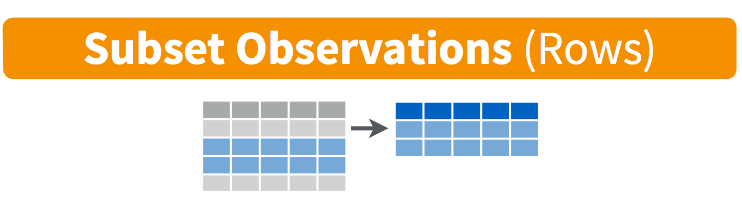

# **filter()**

> **filter(data, ...)** : La función se utiliza para generar un subconjunto de un data frame, reteniendo todas las filas que satisfacen las condiciones. Para ser retenida, la fila debe producir un valor de TRUE para todas las condiciones. Algunos operadores y funciones empleadas:

> - ==, >=, <=, >, <,

> - &, |, !, xor(),

> - is.na()

> - between(), near()


# Ejemplo:

In [60]:
df04 <- starwars %>%
  filter(!is.na(hair_color)) %>%
  filter(birth_year <= 50) %>%
  filter(sex == 'male' & species == 'Human') %>% 
  filter(between(mass, 80, 100)) 
  
head(df04)
#unique(df01$mass)

name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships
<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<list>,<list>,<list>
Biggs Darklighter,183,84,black,light,brown,24.0,male,masculine,Tatooine,Human,A New Hope,,X-wing
Anakin Skywalker,188,84,blond,fair,blue,41.9,male,masculine,Tatooine,Human,"Attack of the Clones, The Phantom Menace , Revenge of the Sith","Zephyr-G swoop bike, XJ-6 airspeeder","Trade Federation cruiser, Jedi Interceptor , Naboo fighter"
Han Solo,180,80,brown,fair,brown,29.0,male,masculine,Corellia,Human,"The Empire Strikes Back, Return of the Jedi , A New Hope , The Force Awakens",,"Millennium Falcon, Imperial shuttle"


# **arrange()**

> **arrange(data, ...)** : ordena las filas de un data frame por los valores de las columnas seleccionadas. Por defecto ordena de forma ascendente (menor a mayor), para indicar el orden de forma descendente emplemos la función auxiliar **desc(variable)**

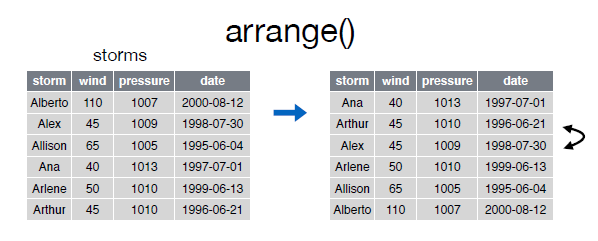

# Ejemplo:

In [67]:
df05 <- starwars %>%
  arrange(desc(gender), name) %>%
  arrange(desc(height))

head(df05)

name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships
<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<list>,<list>,<list>
Yarael Poof,264,NA,none,white,yellow,NA,male,masculine,Quermia,Quermian,The Phantom Menace,,
Tarfful,234,136,brown,brown,blue,NA,male,masculine,Kashyyyk,Wookiee,Revenge of the Sith,,
Lama Su,229,88,none,grey,black,NA,male,masculine,Kamino,Kaminoan,Attack of the Clones,,
Chewbacca,228,112,brown,unknown,blue,200,male,masculine,Kashyyyk,Wookiee,"The Empire Strikes Back, Revenge of the Sith , Return of the Jedi , A New Hope , The Force Awakens",AT-ST,"Millennium Falcon, Imperial shuttle"
Roos Tarpals,224,82,none,grey,orange,NA,male,masculine,Naboo,Gungan,The Phantom Menace,,
Grievous,216,159,none,"brown, white","green, yellow",NA,male,masculine,Kalee,Kaleesh,Revenge of the Sith,Tsmeu-6 personal wheel bike,Belbullab-22 starfighter


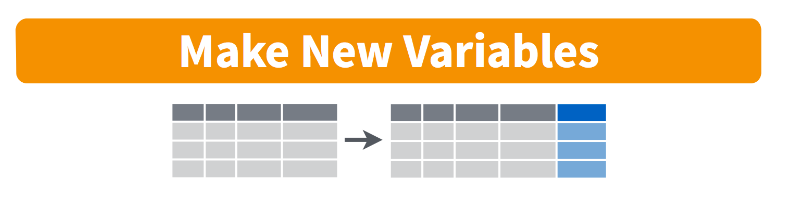

# **mutate()** 

Añade nuevas variables (columnas) que son funciones de variables existentes. Tambien modifica las variables ya existentes.

> **mutate(data, ...)**

# Ejemplo:

In [97]:
df06 <- starwars %>%
  mutate(imc = mass/height^2) %>%
  filter(!is.na(height), !is.na(mass))

head(df06)

name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships,imc
<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<list>,<list>,<list>,<dbl>
Luke Skywalker,172,77,blond,fair,blue,19.0,male,masculine,Tatooine,Human,"The Empire Strikes Back, Revenge of the Sith , Return of the Jedi , A New Hope , The Force Awakens","Snowspeeder , Imperial Speeder Bike","X-wing , Imperial shuttle",0.002602758
C-3PO,167,75,NA,gold,yellow,112.0,none,masculine,Tatooine,Droid,"The Empire Strikes Back, Attack of the Clones , The Phantom Menace , Revenge of the Sith , Return of the Jedi , A New Hope",,,0.002689232
R2-D2,96,32,NA,"white, blue",red,33.0,none,masculine,Naboo,Droid,"The Empire Strikes Back, Attack of the Clones , The Phantom Menace , Revenge of the Sith , Return of the Jedi , A New Hope , The Force Awakens",,,0.003472222
Darth Vader,202,136,none,white,yellow,41.9,male,masculine,Tatooine,Human,"The Empire Strikes Back, Revenge of the Sith , Return of the Jedi , A New Hope",,TIE Advanced x1,0.003333007
Leia Organa,150,49,brown,light,brown,19.0,female,feminine,Alderaan,Human,"The Empire Strikes Back, Revenge of the Sith , Return of the Jedi , A New Hope , The Force Awakens",Imperial Speeder Bike,,0.002177778
Owen Lars,178,120,"brown, grey",light,blue,52.0,male,masculine,Tatooine,Human,"Attack of the Clones, Revenge of the Sith , A New Hope",,,0.003787401


# **Caso Práctico : Incidencia delictiva**


Incidencia delictiva del fuero común a nivel municipal. El dataset contiene $7$ archivos con los años del $2015$ al $2021$, con los siguientes encabezados:

- 'Año'
- 'Clave_Ent'
- 'Entidad'
- 'Cve. Municipio'
- 'Municipio'
- 'Bien jurídico afectado'
- 'Tipo de delito'
- 'Subtipo de delito'
- 'Modalidad'
- 'Enero'
- 'Febrero'
- 'Marzo'
- 'Abril'
- 'Mayo'
- 'Junio'
- 'Julio'
- 'Agosto'
- 'Septiembre'
- 'Octubre'
- 'Noviembre'
- 'Diciembre'

**Fuente** : [Incidencia Delictiva](https://datos.gob.mx/busca/dataset/incidencia-delictiva-del-fuero-comun-a-nivel-municipal)

In [ ]:
library('tidyr')
library('dplyr')

In [ ]:
# download from github
# download.file(url ='https://github.com/JulioCesarMS/R_course/blob/master/datasets/Delitos.zip', destfile = "Delitos.zip")


In [ ]:
unzip(zipfile = "Municipal-Delitos-2015-2021_dic2021.zip")

In [ ]:
df2015 <- read.csv('2015.csv', header=T, fileEncoding = "Latin1", check.names = F)
head(df2015)

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,⋯,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2,⋯,1,1,0,1,1,0,2,1,0,1
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,⋯,0,0,0,1,0,1,0,0,0,0
3,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,⋯,1,1,3,2,0,1,2,0,0,0
4,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,1,⋯,0,1,0,0,0,0,0,0,0,0
5,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,⋯,0,0,1,0,0,0,0,0,0,0
6,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma blanca,0,⋯,0,0,0,0,0,0,0,0,0,0


# **Lectura de datasets**

Agregamos en una lista todas las bases, del  $2015$  al  $2021$.

In [ ]:
names <- c(2015:2021)
df_list <- list()
for(i in 1:length(names)){
  df_list[[i]] <- read.csv(paste(names[i], '.csv', sep=''), header=T, fileEncoding = "Latin1", check.names = FALSE)
}

Con la función $do.call()$ concatenamos por filas todos dataframes en la lista que generamos. 

In [ ]:
df_delitos <- do.call("rbind", df_list)

Verificamos que nuestro dataframe "df_delitos" contenga todos los años.

In [ ]:
unique(df_delitos$Año)

[1] 2015 2016 2017 2018 2019 2020 2021

In [ ]:
colnames(df_delitos)

[1] "Año"                    "Clave_Ent"              "Entidad"               
 [4] "Cve. Municipio"         "Municipio"              "Bien jurídico afectado"
 [7] "Tipo de delito"         "Subtipo de delito"      "Modalidad"             
[10] "Enero"                  "Febrero"                "Marzo"                 
[13] "Abril"                  "Mayo"                   "Junio"                 
[16] "Julio"                  "Agosto"                 "Septiembre"            
[19] "Octubre"                "Noviembre"              "Diciembre"

In [ ]:
head(df_delitos)

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,⋯,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2,⋯,1,1,0,1,1,0,2,1,0,1
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,⋯,0,0,0,1,0,1,0,0,0,0
3,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,⋯,1,1,3,2,0,1,2,0,0,0
4,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,1,⋯,0,1,0,0,0,0,0,0,0,0
5,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,⋯,0,0,1,0,0,0,0,0,0,0
6,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma blanca,0,⋯,0,0,0,0,0,0,0,0,0,0


In [ ]:
unique(df_delitos$`Tipo de delito`)

[1] "Homicidio"                                                                    
 [2] "Lesiones"                                                                     
 [3] "Feminicidio"                                                                  
 [4] "Aborto"                                                                       
 [5] "Otros delitos que atentan contra la vida y la integridad corporal"            
 [6] "Secuestro"                                                                    
 [7] "Tráfico de menores"                                                           
 [8] "Rapto"                                                                        
 [9] "Otros delitos que atentan contra la libertad personal"                        
[10] "Abuso sexual"                                                                 
[11] "Acoso sexual"                                                                 
[12] "Hostigamiento sexual"                                                         
[13] "Violación simple"                                                             
[14] "Violación equiparada"                                                         
[15] "Incesto"                                                                      
[16] "Otros delitos que atentan contra la libertad y la seguridad sexual"           
[17] "Robo"                                                                         
[18] "Fraude"                                                                       
[19] "Abuso de confianza"                                                           
[20] "Extorsión"                                                                    
[21] "Daño a la propiedad"                                                          
[22] "Despojo"                                                                      
[23] "Otros delitos contra el patrimonio"                                           
[24] "Violencia familiar"                                                           
[25] "Violencia de género en todas sus modalidades distinta a la violencia familiar"
[26] "Incumplimiento de obligaciones de asistencia familiar"                        
[27] "Otros delitos contra la familia"                                              
[28] "Corrupción de menores"                                                        
[29] "Trata de personas"                                                            
[30] "Otros delitos contra la sociedad"                                             
[31] "Narcomenudeo"                                                                 
[32] "Amenazas"                                                                     
[33] "Allanamiento de morada"                                                       
[34] "Evasión de presos"                                                            
[35] "Falsedad"                                                                     
[36] "Falsificación"                                                                
[37] "Contra el medio ambiente"                                                     
[38] "Delitos cometidos por servidores públicos"                                    
[39] "Electorales"                                                                  
[40] "Otros delitos del Fuero Común"

Generamos un dataframe con el nombre del mes y su correspondiente número. 

In [ ]:
mes <- data.frame('Mes'=c('Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'),
                  'MesNum' = c('01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'))


## **Ejercicio 1:**



- Deseamos información sobre los municipios del estado de **Nuevo León** con mayor cantidad de homicidios dolosos con arma de fuego en el mes de enero del año $2021$.

In [ ]:
# Solución
df_delitos_1 <- df_delitos %>%  
  select(Año, Entidad, Municipio, `Tipo de delito`, `Subtipo de delito`, Modalidad, Enero) %>%
  filter(Año == 2021, Entidad=="Nuevo León", `Subtipo de delito`=="Homicidio doloso", Modalidad=="Con arma de fuego") %>%
  arrange(desc(Enero)) %>%
  filter(Enero != 0)

df_delitos_1

Año,Entidad,Municipio,Tipo de delito,Subtipo de delito,Modalidad,Enero
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
2021,Nuevo León,Monterrey,Homicidio,Homicidio doloso,Con arma de fuego,13
2021,Nuevo León,Guadalupe,Homicidio,Homicidio doloso,Con arma de fuego,11
2021,Nuevo León,San Nicolás de los Garza,Homicidio,Homicidio doloso,Con arma de fuego,8
2021,Nuevo León,García,Homicidio,Homicidio doloso,Con arma de fuego,6
2021,Nuevo León,General Escobedo,Homicidio,Homicidio doloso,Con arma de fuego,6
2021,Nuevo León,Juárez,Homicidio,Homicidio doloso,Con arma de fuego,5
2021,Nuevo León,Apodaca,Homicidio,Homicidio doloso,Con arma de fuego,4
2021,Nuevo León,Cadereyta Jiménez,Homicidio,Homicidio doloso,Con arma de fuego,3
2021,Nuevo León,Santa Catarina,Homicidio,Homicidio doloso,Con arma de fuego,3


In [ ]:
dim(df_delitos_1)

[1] 11  9

# **Ejemplo 2:**

Deseamos información sobre los $10$ municipios del país de  con mayor cantidad de **secuestros de tipo extorsivo**  en el año $2021$. Mostrar el total por municipio en forma descendente.    

| Año  | Entidad         | Municipio       | Modalidad         | Total |
| --   | --              | --              | --                | -- |
| 2021 | Chihuahua  |  Juárez | Secuestro extrosivo | 15 |
| -    | -  |  -  | -  | - |

In [ ]:
# Solución
df_delitos_1 <- df_delitos %>%  
  ########  Agregar código

df_delitos_1

,Año,Entidad,Municipio,Modalidad,Total
,<int>,<chr>,<chr>,<chr>,<int>
1,2021,Chihuahua,Juárez,Secuestro extorsivo,15
2,2021,México,Toluca,Secuestro extorsivo,11
3,2021,Michoacán de Ocampo,Uruapan,Secuestro extorsivo,11
4,2021,Quintana Roo,Benito Juárez,Secuestro extorsivo,11
5,2021,San Luis Potosí,San Luis Potosí,Secuestro extorsivo,11
6,2021,Baja California,Tijuana,Secuestro extorsivo,10
7,2021,México,Zinacantepec,Secuestro extorsivo,8
8,2021,México,Ecatepec de Morelos,Secuestro extorsivo,7
9,2021,Nuevo León,Monterrey,Secuestro extorsivo,7


# **Actividad**

In [105]:
library("tidyverse")
options(repr.plot.width=16, repr.plot.height=8)

# Lectura de datos

In [106]:
unzip(zipfile = "flights.zip")

In [108]:
flights <- read.csv('flights.csv', header=T, fileEncoding = "Latin1", check.names = F)
head(flights)

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>
1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,01/01/2013 05:00
2,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,01/01/2013 05:00
3,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,01/01/2013 05:00
4,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,01/01/2013 05:00
5,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,01/01/2013 06:00
6,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,01/01/2013 05:00


# Descripción de variables

| Variable         | Descripción |
| :--- | :--- |
| dep_time         | Hora real de salida |
| sched_dep_time   | Horario de salida y llegada programado |
| dep_delay        | Retraso de salida, en minutos. Los tiempos negativos representan salidas tempranas |
| arr_time         | Hora real de salida y de llegada |
| sched_arr_time   | Horario de llegada programado |
| arr_delay        | Retraso de llegada, en minutos. Los tiempos negativos representan llegadas tempranas |
| carrier          | Abreviación de la auerolínea |
| flight           | Número de vuelo |
| tailnum          | Número de avión |
| origin           | Origen |
| dest             | Destino |
| air_time         | Cantidad de tiempo en el aire, en minutos |
| distance         | Distancia entre aeropuertos, en millas |
| hour             | Hora de salida prevista desglosada en hora  |
| minute           | Hora de salida prevista desglosada en minutos |
| time_hour        | Fecha y hora prevista del vuelo |

[**Ejercicio 1**] 
- Crear varibles: año, mes y día (hecho), y 
- Seleccionar las variables: time_hour, year, month, day, flight, air_time, distance. 
- Eliminar la variable  time_hour.
- Filtrar por mes de enero a marzo y ordenar el día de forma descendente.
- Convertir air_time(minutos) a horas.
- Convertir la distancia(millas) a km (1 milla $\sim$ 1.60km)

In [112]:
# crear varibles año, mes y día, y seleccionar flight, air_time, y distance
flights2 <- flights %>% 
    mutate('year' = as.numeric(substring(time_hour, 7, 10)),
           'month' = as.numeric(substring(time_hour, 4, 5)),
           'day' = as.numeric(substring(time_hour, 1, 2))) %>%
    ## agragar código
    
head(flights2)

,time_hour,year,month,day,flight,air_time,distance
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,01/01/2013 05:00,2013,1,1,1545,227,1400
2,01/01/2013 05:00,2013,1,1,1714,227,1416
3,01/01/2013 05:00,2013,1,1,1141,160,1089
4,01/01/2013 05:00,2013,1,1,725,183,1576
5,01/01/2013 06:00,2013,1,1,461,116,762
6,01/01/2013 05:00,2013,1,1,1696,150,719


In [ ]:
head(flights2, 4)